# Amazon Product Recommendation System

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For text preprocessing
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_score, recall_score, f1_score
from textblob import TextBlob

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns



# For visualizations
from wordcloud import WordCloud
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from scipy.sparse import coo_matrix

# Load spaCy model
nlp = spacy.load("en_core_web_sm")


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [48]:
# Load the dataset
data = pd.read_csv("/kaggle/input/amazon-product-review-dataset/7817_1.csv")

# display the data
data

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [49]:
# Check data information and types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [50]:
# Check for missing values before cleanup
print("Missing values before cleanup:")
print(data.isnull().sum())

Missing values before cleanup:
id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


<Axes: >

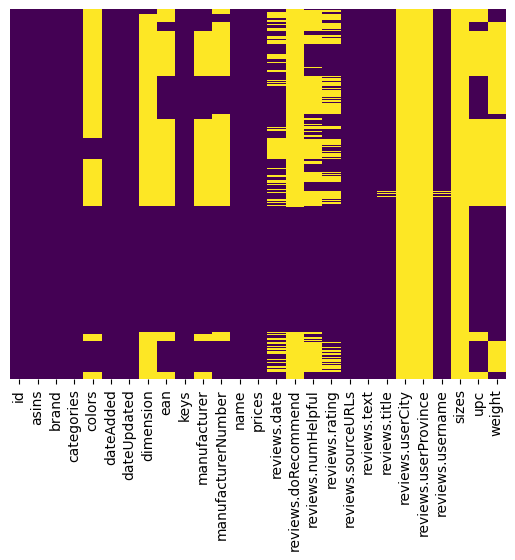

In [51]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", yticklabels=False)

significant missing values in colors and sizes columns

In [52]:
# Drop irrelevant columns
columns_to_drop = [
    "colors", "dimension", "ean", "dateAdded", "dateUpdated", "keys", "manufacturer", "manufacturerNumber",
    "reviews.date", "reviews.doRecommend", "prices", "reviews.numHelpful",
    "reviews.userCity", "reviews.userProvince", "sizes", "upc", "weight"
]
data = data.drop(columns=columns_to_drop)

Removing above columns becuse they have high amount of missing data and Irrelevant for recommendations.


In [53]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'name', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username'],
      dtype='object')

In [54]:
# Enhanced function
def sentiment_to_rating(text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return 3  # Default neutral rating
        polarity = TextBlob(text).sentiment.polarity
        if polarity <= -0.5:
            return 1
        elif -0.5 < polarity <= 0:
            return 2
        elif 0 < polarity <= 0.5:
            return 4
        else:
            return 5
    except:
        return 3

# Apply imputation
data['reviews.rating'] = data.apply(
    lambda row: sentiment_to_rating(row['reviews.text']) if pd.isnull(row['reviews.rating']) else row['reviews.rating'],
    axis=1
)

# Convert to integer
data['reviews.rating'] = data['reviews.rating'].astype(int)

# Verify missing values
print("Missing values in reviews.rating after imputation:", data['reviews.rating'].isnull().sum())


Missing values in reviews.rating after imputation: 0


In [55]:
# Handle missing values in `reviews.title`
def generate_title_from_text(text):
    try:
        # Generate title from the first few words of the review text
        return " ".join(text.split()[:5]) if isinstance(text, str) else "No Title"
    except:
        return "No Title"

# Impute missing titles
data['reviews.title'] = data['reviews.title'].fillna(
    data['reviews.text'].apply(generate_title_from_text)
)

# Handle missing values in `reviews.username`
data['reviews.username'] = data['reviews.username'].fillna("Anonymous")

# Verify that there are no missing values in `reviews.title` and `reviews.username`
print("Missing values in reviews.title after imputation:", data['reviews.title'].isnull().sum())
print("Missing values in reviews.username after imputation:", data['reviews.username'].isnull().sum())



Missing values in reviews.title after imputation: 0
Missing values in reviews.username after imputation: 0


In [56]:
# Check for missing values after cleanup
print("Missing values after cleanup:")
print(data.isnull().sum())



Missing values after cleanup:
id                    0
asins                 0
brand                 0
categories            0
name                  0
reviews.rating        0
reviews.sourceURLs    0
reviews.text          0
reviews.title         0
reviews.username      0
dtype: int64


In [57]:
# Check data information and types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  1597 non-null   object
 1   asins               1597 non-null   object
 2   brand               1597 non-null   object
 3   categories          1597 non-null   object
 4   name                1597 non-null   object
 5   reviews.rating      1597 non-null   int64 
 6   reviews.sourceURLs  1597 non-null   object
 7   reviews.text        1597 non-null   object
 8   reviews.title       1597 non-null   object
 9   reviews.username    1597 non-null   object
dtypes: int64(1), object(9)
memory usage: 124.9+ KB
None


In [58]:
data.duplicated().sum()

5

In [59]:
data = data.drop_duplicates()


In [60]:
# Define the column mapping dictionary
column_mapping = {
    'id': 'ProdID',
    'asins': 'ASIN',
    'brand': 'Brand',
    'categories': 'Category',
    'name': 'Name',
    'reviews.rating': 'Rating',
    'reviews.sourceURLs': 'URLs',
    'reviews.text': 'Review Text',
    'reviews.title': 'Review Title',
    'reviews.username': 'Username'
}

# Rename the columns using the mapping dictionary
data.rename(columns=column_mapping, inplace=True)

# Verify the updated column names
print(data.columns)


Index(['ProdID', 'ASIN', 'Brand', 'Category', 'Name', 'Rating', 'URLs',
       'Review Text', 'Review Title', 'Username'],
      dtype='object')


In [61]:
# Create a User ID for each unique Username
data['UserID'] = pd.factorize(data['Username'])[0]

# Verify the User ID assignment
print(data[['Username', 'UserID']].head())


             Username  UserID
0          Cristina M       0
1               Ricky       1
2       Tedd Gardiner       2
3              Dougal       3
4  Miljan David Tanic       4


In [62]:
# Function to clean and simplify categories
def clean_categories(cat):
    if isinstance(cat, str):
        # Split the category string and take the first category
        return cat.split(",")[0].strip().lower()  # Normalize to lowercase
    return "unknown"  # Handle missing or invalid values

# Apply the cleaning function to the categories column
data["Category"] = data["Category"].apply(clean_categories)

# Display unique simplified categories
print(data["Category"].unique())


['amazon devices' 'kindle store' 'categories'
 'amazon devices & accessories' 'electronics' 'cell phones & accessories']


In [63]:
# Create synthetic product descriptions by combining 'name' and 'categories'
data["Description"] = data["Name"] + " " + data["Category"] + " " + data["Brand"]
# Check the first few rows of the synthetic descriptions
data[["Name", "Category", "Brand","Description"]].head()


,Name,Category,Brand,Description
0,Kindle Paperwhite,amazon devices,Amazon,Kindle Paperwhite amazon devices Amazon
1,Kindle Paperwhite,amazon devices,Amazon,Kindle Paperwhite amazon devices Amazon
2,Kindle Paperwhite,amazon devices,Amazon,Kindle Paperwhite amazon devices Amazon
3,Kindle Paperwhite,amazon devices,Amazon,Kindle Paperwhite amazon devices Amazon
4,Kindle Paperwhite,amazon devices,Amazon,Kindle Paperwhite amazon devices Amazon


In [64]:
data['ProdID']= data['ProdID'].str.extract(r'(\d+)').astype(float)

In [65]:
data

,ProdID,ASIN,Brand,Category,Name,Rating,URLs,Review Text,Review Title,Username,UserID,Description
0,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,0,Kindle Paperwhite amazon devices Amazon
1,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,1,Kindle Paperwhite amazon devices Amazon
2,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,4,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner,2,Kindle Paperwhite amazon devices Amazon
3,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal,3,Kindle Paperwhite amazon devices Amazon
4,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic,4,Kindle Paperwhite amazon devices Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,3,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,GregAmandawith4,946,Alexa Voice Remote for Amazon Fire TV and Fire...
1593,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,1,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,Amazon Customer,54,Alexa Voice Remote for Amazon Fire TV and Fire...
1594,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,1,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,Amazon Customer,54,Alexa Voice Remote for Amazon Fire TV and Fire...
1595,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,3,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,Meg Ashley,947,Alexa Voice Remote for Amazon Fire TV and Fire...


# Text Preprocessing and Tag Creation

In [66]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using spaCy
def preprocess_text_spacy(text):
    # Process text with spaCy
    doc = nlp(text.lower())  # Convert text to lowercase and tokenize
    # Remove stopwords and non-alphabetic tokens, and lemmatize
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    # Join tokens back into a single string
    return " ".join(tokens)

# Function to clean and extract tags
def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and not token.is_stop]
    return ', '.join(tags)

# Preprocess the 'Review Text' and 'Description' columns
data['Review Text'] = data['Review Text'].apply(preprocess_text_spacy)
data['Description'] = data['Description'].apply(preprocess_text_spacy)

# Clean and extract tags from both 'Review Text' and 'Description' columns
data['Review Tags'] = data['Review Text'].apply(clean_and_extract_tags)
data['Description Tags'] = data['Description'].apply(clean_and_extract_tags)

# Combine tags from 'Review Tags' and 'Description Tags' to create the final 'Tags' column
data['Tags'] = data['Review Tags'] + ', ' + data['Description Tags']

# Optionally, you can drop the intermediate 'Review Tags' and 'Description Tags' columns
data.drop(columns=['Review Tags', 'Description Tags'], inplace=True)

# Display the cleaned data with the 'Tags' column
data[['ProdID', 'Tags']].head()

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


,ProdID,Tags
0,7.0,"initially, trouble, decide, paperwhite, voyage..."
1,7.0,"allow, preface, little, history, casual, reade..."
2,7.0,"enjoy, far, great, reading, original, fire, fi..."
3,7.0,"buy, paperwhite, pleased, constant, companion,..."
4,7.0,"upfront, like, coroporate, hermetically, close..."


In [67]:
data

,ProdID,ASIN,Brand,Category,Name,Rating,URLs,Review Text,Review Title,Username,UserID,Description,Tags
0,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,initially trouble decide paperwhite voyage rev...,"Paperwhite voyage, no regrets!",Cristina M,0,kindle paperwhite amazon devices amazon,"initially, trouble, decide, paperwhite, voyage..."
1,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,allow preface little history casual reader own...,One Simply Could Not Ask For More,Ricky,1,kindle paperwhite amazon devices amazon,"allow, preface, little, history, casual, reade..."
2,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,4,https://www.amazon.com/Kindle-Paperwhite-High-...,enjoy far great reading original fire fire eye...,Great for those that just want an e-reader,Tedd Gardiner,2,kindle paperwhite amazon devices amazon,"enjoy, far, great, reading, original, fire, fi..."
3,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,buy paperwhite pleased constant companion supp...,Love / Hate relationship,Dougal,3,kindle paperwhite amazon devices amazon,"buy, paperwhite, pleased, constant, companion,..."
4,7.0,B00QJDU3KY,Amazon,amazon devices,Kindle Paperwhite,5,https://www.amazon.com/Kindle-Paperwhite-High-...,upfront like coroporate hermetically closed st...,I LOVE IT,Miljan David Tanic,4,kindle paperwhite amazon devices amazon,"upfront, like, coroporate, hermetically, close..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,3,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,remote get alexa echo control volume think rem...,I would be disappointed with myself if i produ...,GregAmandawith4,946,alexa voice remote amazon fire tv fire tv stic...,"remote, alexa, echo, control, volume, think, r..."
1593,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,1,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,change battery remote twice month purchase mar...,Battery draining remote!!!!,Amazon Customer,54,alexa voice remote amazon fire tv fire tv stic...,"change, battery, remote, twice, month, purchas..."
1594,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,1,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,remote activate connect poorly design remote r...,replacing an even worse remote. Waste of time,Amazon Customer,54,alexa voice remote amazon fire tv fire tv stic...,"remote, activate, connect, poorly, design, rem..."
1595,9.0,B00NO8JJZW,Amazon,amazon devices & accessories,Alexa Voice Remote for Amazon Fire TV and Fire...,3,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,job super price feel like offer replacement re...,Overpriced,Meg Ashley,947,alexa voice remote amazon fire tv fire tv stic...,"job, super, price, feel, like, offer, replacem..."


# EDA


In [68]:
num_users = data['UserID'].nunique()
num_items = data['ProdID'].nunique()
num_ratings = data['Rating'].nunique()

print(f"Number of Users: {num_users}")
print(f"Number of Products: {num_items}")
print(f"Number of Ratings: {num_ratings}")

Number of Users: 949
Number of Products: 16
Number of Ratings: 5


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


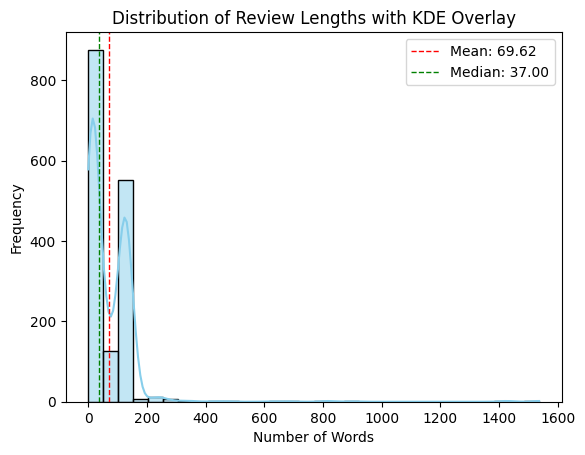

Summary Statistics for Review Lengths:
Mean Length: 69.62
Median Length: 37.0
Maximum Length: 1536
Minimum Length: 0


In [69]:
# Add a column for review length
data["Review_length"] = data["Review Text"].apply(lambda x: len(x.split()))

# Calculate summary statistics
mean_length = data["Review_length"].mean()
median_length = data["Review_length"].median()
max_length = data["Review_length"].max()
min_length = data["Review_length"].min()

# Plot histogram with KDE overlay
sns.histplot(data["Review_length"], bins=30, kde=True, color="skyblue", edgecolor="black")
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_length:.2f}')

# Add labels, title, and legend
plt.title("Distribution of Review Lengths with KDE Overlay")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

# Print summary statistics
print(f"Summary Statistics for Review Lengths:")
print(f"Mean Length: {mean_length:.2f}")
print(f"Median Length: {median_length}")
print(f"Maximum Length: {max_length}")
print(f"Minimum Length: {min_length}")

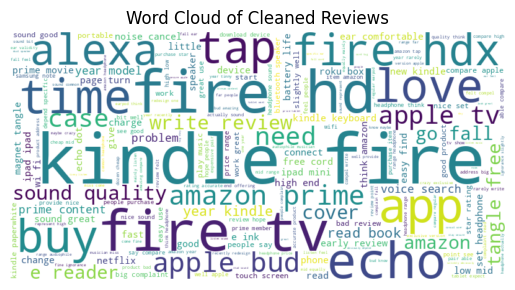

In [70]:
# Generate a word cloud from cleaned reviews
text = " ".join(review for review in data["Review Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Reviews")
plt.show()


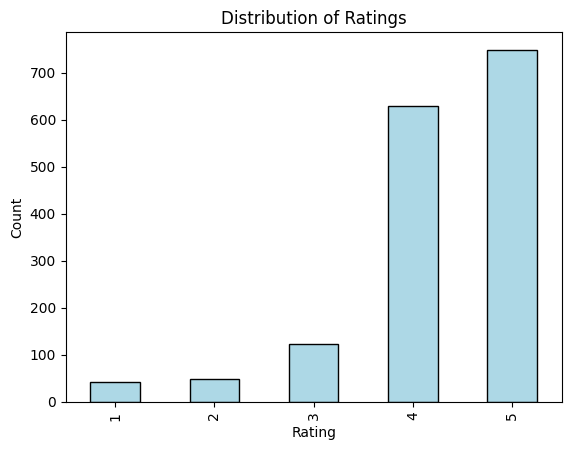

In [71]:
# Plot the distribution of ratings
data["Rating"].value_counts().sort_index().plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


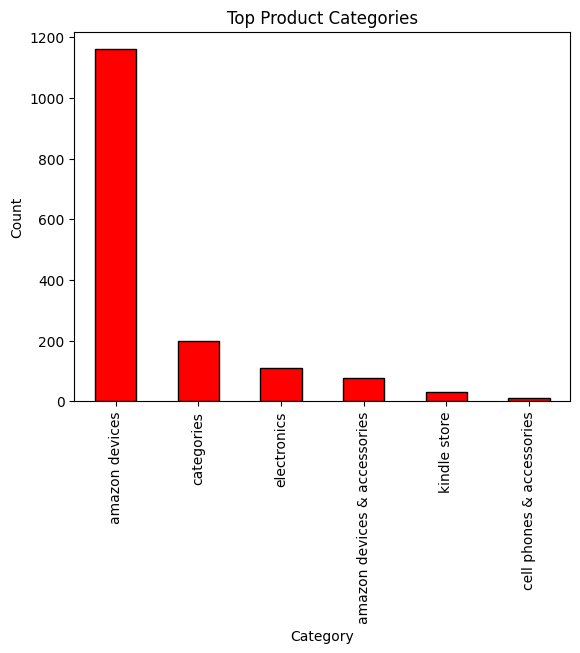

In [72]:
# Plot the top 10 product categories
data["Category"].value_counts().head(10).plot(kind="bar", color="Red", edgecolor="black")
plt.title("Top Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


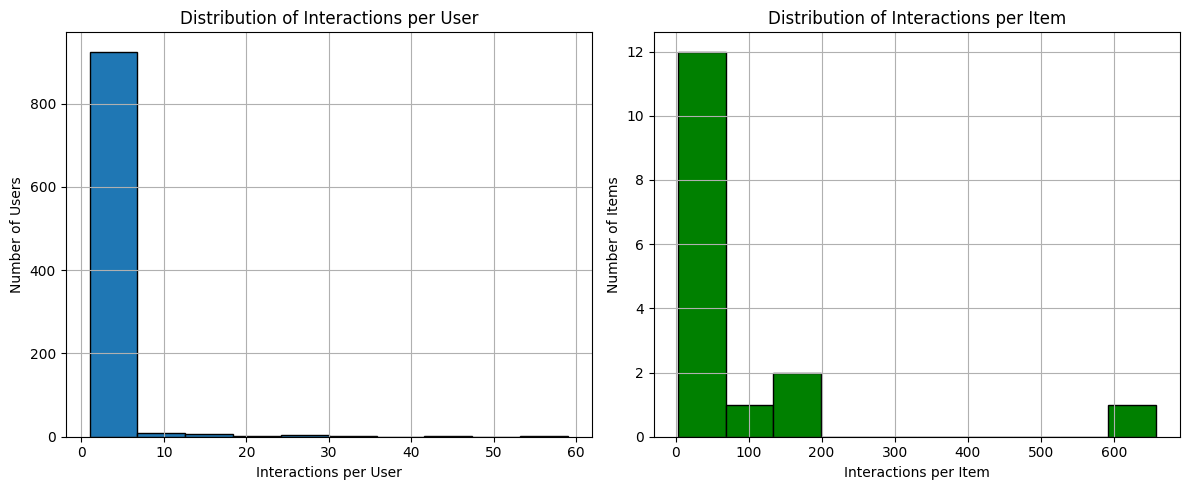

In [73]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
data['UserID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

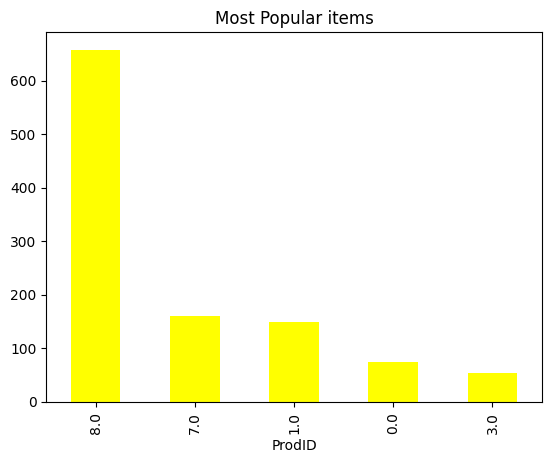

In [74]:
# Most popular items
popular_items = data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='yellow')
plt.title("Most Popular items")

# Build the Recommendation System

# Rating Base Recommendations System

In [75]:
# Group by relevant columns and calculate the average rating
average_ratings = data.groupby(['Name', 'Username', 'Review Text', 'Brand', 'URLs'])['Rating'].mean().reset_index()

In [76]:
# Sort items by their average ratings in descending order
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

# Take the top 10 items
rating_base_recommendation = top_rated_items.head(10)

In [77]:
# Ensure 'Rating' is converted to an integer if needed
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)

<ipython-input-77-fb6662382e11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)


In [78]:
# Print a message to indicate this is the trending products list
print("Rating Base Recommendation System: (Trending Products)")

# Reset the index for better readability
rating_base_recommendation = rating_base_recommendation.reset_index(drop=True)

# Select only the desired columns for the output
rating_base_recommendation = rating_base_recommendation[['Name', 'Username', 'Review Text', 'Brand', 'Rating', 'URLs']]

# Display the result
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


,Name,Username,Review Text,Brand,Rating,URLs
0,Alexa Voice Remote for Amazon Echo and Echo Dot,kemilie,reviewer wish remote come handy magnetic base ...,Amazon,5,https://www.amazon.com/Alexa-Voice-Remote-Amaz...
1,Alexa Voice Remote for Amazon Echo and Echo Dot,cc,far want purchase have alex hear bedroom dinin...,Amazon,5,https://www.amazon.com/Alexa-Voice-Remote-Amaz...
2,Kindle,ShirtGuy,kindle buy buy father girlfriend little know f...,Amazon,5,https://www.amazon.com/gp/product/B007HCCNJU/r...
3,Moshi Anti-Glare No Bubble Screen Protector fo...,Somebody,purchase screen protector att fire phone perfo...,Moshi,5,https://www.amazon.com/Moshi-Anti-Glare-Bubble...
4,Moshi Anti-Glare No Bubble Screen Protector fo...,zman,far work great fit kayscase armor box perfectl...,Moshi,5,https://www.amazon.com/Moshi-Anti-Glare-Bubble...
5,Replacement Remote for Amazon Fire TV Stick,Colby R. Zell,product like move clue little remote end need ...,Amazon,5,https://www.amazon.com/Replacement-Remote-Amaz...
6,Kindle E-reader - Black,Alex,people say dark literally screen old device lo...,Amazon,5,https://www.amazon.com/Amazon-Kindle-eReader-6...
7,Kindle E-reader - Black,Dina,shocked go book phd dissertation highlight par...,Amazon,5,https://www.amazon.com/Amazon-Kindle-eReader-6...
8,Kindle E-reader - Black,Linda S Fox,love new kindle price right extra small hand k...,Amazon,5,https://www.amazon.com/Amazon-Kindle-eReader-6...
9,Kindle E-reader - Black,MissOliviaP,know bad review let start point obvious go rec...,Amazon,5,https://www.amazon.com/Amazon-Kindle-eReader-6...


# Content-Based Filtering Recommendation system

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [80]:
data['Name'][0]

'Kindle Paperwhite'

In [81]:
item_name = 'Kindle Paperwhite'
item_index = data[data['Name']==item_name].index[0]

In [82]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [83]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [84]:
data.iloc[recommended_items_indics][['ASIN','Name','Rating','Brand', 'URLs']]



,ASIN,Name,Rating,Brand,URLs
8,B00QJDU3KY,Kindle Paperwhite,4,Amazon,http://www.amazon.com/Kindle-Paperwhite-High-R...
737,B00KSR13CE,Kindle Paperwhite,5,Amazon,https://www.amazon.com/Kindle-Paperwhite-Resol...
740,B00KSR13CE,Kindle Paperwhite,4,Amazon,http://www.amazon.com/Paperwhite-Resolution-Di...
743,B00KSR13CE,Kindle Paperwhite,4,Amazon,http://www.amazon.com/Kindle-Paperwhite-Resolu...
746,B00KSR13CE,Kindle Paperwhite,4,Amazon,http://www.amazon.com/Kindle-Paperwhite-High-R...
778,B00DOPNK14,Kindle Paperwhite,5,Amazon,https://www.amazon.com/gp/product/B00AWH595M/r...
254,B01J2G4VBG,Kindle Voyage E-reader,5,Amazon,https://www.amazon.com/Amazon-Kindle-Voyage-6-...
279,B00PD81ETU,Certified Refurbished Kindle Voyage E-reader w...,5,Amazon,https://www.amazon.com/Certified-Refurbished-K...
263,B010EK1GOE,Kindle Oasis with Leather Charging Cover - Black,5,Amazon,https://www.amazon.com/Kindle-Oasis-Leather-Ch...


# Function To Recommend Products for Content Based

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = data[data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = data.iloc[recommended_item_indices][['ASIN', 'Name', 'Brand', 'URLs', 'Rating']]

    return recommended_items_details

In [86]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kindle Voyage E-reader'
content_based_rec = content_based_recommendations(data, item_name, top_n=8)

content_based_rec

,ASIN,Name,Brand,URLs,Rating
257,B00QJDS7I4,Kindle Paperwhite E-reader - Black,Amazon,http://www.amazon.com/All-New-Kindle-Paperwhit...,5
210,B00QJDVBFU,Kindle Paperwhite 3G,Amazon,https://www.amazon.com/Kindle-Paperwhite-High-...,5
260,B00U879XZ8,Certified Refurbished Kindle Paperwhite E-read...,Amazon,https://www.amazon.com/Certified-Refurbished-K...,5
511,"B008GG93YE,B00LWHUBPO,B0051QYGXA",Kindle,Amazon,http://www.amazon.com/Kindle-Ereader-ebook-rea...,4
514,"B008GG93YE,B00LWHUBPO,B0051QYGXA",Kindle,Amazon,http://www.amazon.com/Kindle-Ereader-ebook-rea...,4
515,"B008GG93YE,B00LWHUBPO,B0051QYGXA",Kindle,Amazon,http://www.amazon.com/Kindle-Ereader-ebook-rea...,4
273,B01A08E70K,Kindle E-reader - Black,Amazon,https://www.amazon.com/Amazon-Kindle-eReader-6...,5
14,B00QJDU3KY,Kindle Paperwhite,Amazon,http://www.amazon.ca/product-reviews/B00QJDU3KY,5


# Collaborative Filtering Recommendation system

In [87]:
# Aggregate reviews for each product by averaging ratings
product_ratings = data.groupby('ProdID').agg({
    'ASIN': 'first',
    'Username': 'first',
    'Rating': 'mean',  # Use mean rating for the same product across users
    'Name': 'first',   # Take the first product name
    'Brand': 'first',  # Take the first brand
    'URLs': 'first'    # Take the first URL
}).reset_index()


In [88]:
# Create User-Item Interaction Matrix
user_item_matrix = data.pivot_table(index='UserID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

In [89]:
# Apply Singular Value Decomposition (SVD) for matrix factorization
svd_model  = TruncatedSVD(n_components=16, random_state=42)
svd_matrix = svd_model.fit_transform(user_item_matrix)

In [90]:
# Calculate similarity between users using cosine similarity
user_similarity = cosine_similarity(svd_matrix)

In [91]:
# Get target user index (e.g., for user 1)
target_user_idx = user_item_matrix.index.get_loc(1)  # Assuming user ID is 1

In [92]:
# Get the similarity scores for the target user
user_similarities = user_similarity[target_user_idx]

# Find the most similar users (excluding the target user)
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [93]:
# Collect recommended products for similar users
recommend_items = []

for user_idx in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_idx]
    # Exclude products already rated by the target user
    not_rated_by_target_user = (rated_by_similar_user > 0) & (user_item_matrix.iloc[target_user_idx] == 0)
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

# Remove duplicates from the recommended items list
recommend_items = list(set(recommend_items))

# Round the ratings to one decimal place
product_ratings['Rating'] = product_ratings['Rating'].round(1)

# Get product details from the aggregated product ratings
recommended_items_details = product_ratings[product_ratings['ProdID'].isin(recommend_items)][['ASIN','Name','Brand', 'URLs', 'Rating']]

# Display top 10 recommended products
recommended_items_details.head(10)


,ASIN,Name,Brand,URLs,Rating
0,B01LW1MS9C,Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,Amazon,https://www.amazon.com/Amazon-Echo-Case-fits-G...,4.3
1,B01FWSVGQQ,Amazon Tap Sling Cover - Tangerine,Amazon,https://www.amazon.com/Amazon-Tap-Sling-Cover-...,4.2
2,B00VKLBU3Y,Fire HD 10 Tablet with Alexa,Amazon,http://www.amazon.com/Fire-HD-10-1-Display-Wi-...,4.3
3,B01LW1MS9C,Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,Amazon,https://www.amazon.com/Amazon-Echo-Case-fits-G...,4.1
4,B00QJDVBFU,Kindle Paperwhite 3G,Amazon,https://www.amazon.com/Kindle-Paperwhite-High-...,3.7
5,B00KDRQEYQ,Certified Refurbished Kindle E-reader,Amazon,http://www.amazon.com/Certified-Refurbished-Sp...,4.3
6,"B008GG93YE,B00LWHUBPO,B0051QYGXA",Kindle,Amazon,https://www.amazon.com/gp/product/B007HCCNJU/r...,4.2
8,B00LWHU9D8,Fire HD 6 Tablet,Amazon,https://www.amazon.com/Fire-Tablet-HD-6-Previo...,4.5
9,B01KIOU214,Amazon Echo - Black,Amazon,https://www.amazon.com/gp/product/B00X4WHP5E/r...,3.5
10,B00VKM5NFY,Fire HD 10 Tablet with Alexa,Amazon,http://www.amazon.com/Fire-HD-10-1-Display-Wi-...,4.7


In [94]:
def collaborative_filtering_recommendations(data, target_user_id, top_n=10):
    # Aggregate reviews for each product by averaging ratings
    product_ratings = data.groupby('ProdID').agg({
        'ASIN': 'first',
        'Username': 'first',
        'Rating': 'mean',  # Use mean rating for the same product across users
        'Name': 'first',   # Take the first product name
        'Brand': 'first',  # Take the first brand
        'URLs': 'first'    # Take the first URL
    }).reset_index()

    # Create the user-item interaction matrix
    user_item_matrix = data.pivot_table(index='UserID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Apply Singular Value Decomposition (SVD) for matrix factorization
    svd = TruncatedSVD(n_components=16, random_state=42)
    svd_matrix = svd.fit_transform(user_item_matrix)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(svd_matrix)

    # Find the index of the target user in the matrix
    target_user_idx = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_idx]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_user_indices = user_similarities.argsort()[::-1][1:]

    # Collect recommended products for similar users
    recommend_items = []

    for user_idx in similar_user_indices:
        rated_by_similar_user = user_item_matrix.iloc[user_idx]
        # Exclude products already rated by the target user
        not_rated_by_target_user = (rated_by_similar_user > 0) & (user_item_matrix.iloc[target_user_idx] == 0)
        recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Remove duplicates from the recommended items list
    recommend_items = list(set(recommend_items))

    # Get the product details (Name, Brand, URLs, Rating) for the recommended products
    recommended_items_details = product_ratings[product_ratings['ProdID'].isin(recommend_items)][['ASIN', 'Name', 'Brand', 'URLs', 'Rating']]

    # Round the ratings to one decimal place
    recommended_items_details['Rating'] = recommended_items_details['Rating'].round(1)

    return recommended_items_details.head(top_n)

# Example usage
target_user_id = 100  # Specify the target user ID
top_n = 5  # Number of recommendations to display
collaborative_filtering_rec = collaborative_filtering_recommendations(data, target_user_id, top_n)

# Display top recommendations for the target user
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 100:


,ASIN,Name,Brand,URLs,Rating
0,B01LW1MS9C,Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,Amazon,https://www.amazon.com/Amazon-Echo-Case-fits-G...,4.3
2,B00VKLBU3Y,Fire HD 10 Tablet with Alexa,Amazon,http://www.amazon.com/Fire-HD-10-1-Display-Wi-...,4.3
3,B01LW1MS9C,Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,Amazon,https://www.amazon.com/Amazon-Echo-Case-fits-G...,4.1
4,B00QJDVBFU,Kindle Paperwhite 3G,Amazon,https://www.amazon.com/Kindle-Paperwhite-High-...,3.7
5,B00KDRQEYQ,Certified Refurbished Kindle E-reader,Amazon,http://www.amazon.com/Certified-Refurbished-Sp...,4.3


# Hybrid Model


In [95]:
# Corrected hybrid recommendation function
def hybrid_recommendations(data, target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(data, item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(data, target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates(subset='ASIN')

    # Remove products that the target user has already rated (if needed)
    rated_products = data[data['UserID'] == target_user_id]['ASIN'].unique()  # Adjust the column name here if needed
    hybrid_rec = hybrid_rec[~hybrid_rec['ASIN'].isin(rated_products)]  # Adjust the column name here as well

    # Return the top N recommendations
    return hybrid_rec.head(top_n)

In [96]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 100  # Change this to the user_id you want recommendations for
item_name = "Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker"  # Change this to the item name
hybrid_rec = hybrid_recommendations(data, target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 100 and Item 'Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker':


,ASIN,Name,Brand,URLs,Rating
1244,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,http://reviews.bestbuy.com/3545/5097300/review...,5.0
0,B01LW1MS9C,Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,Amazon,https://www.amazon.com/Amazon-Echo-Case-fits-G...,4.3
2,B00VKLBU3Y,Fire HD 10 Tablet with Alexa,Amazon,http://www.amazon.com/Fire-HD-10-1-Display-Wi-...,4.3
4,B00QJDVBFU,Kindle Paperwhite 3G,Amazon,https://www.amazon.com/Kindle-Paperwhite-High-...,3.7
5,B00KDRQEYQ,Certified Refurbished Kindle E-reader,Amazon,http://www.amazon.com/Certified-Refurbished-Sp...,4.3
6,"B008GG93YE,B00LWHUBPO,B0051QYGXA",Kindle,Amazon,https://www.amazon.com/gp/product/B007HCCNJU/r...,4.2
7,B00QJDU3KY,Kindle Paperwhite,Amazon,https://www.amazon.com/Kindle-Paperwhite-High-...,4.1
8,B00LWHU9D8,Fire HD 6 Tablet,Amazon,https://www.amazon.com/Fire-Tablet-HD-6-Previo...,4.5
9,B01KIOU214,Amazon Echo - Black,Amazon,https://www.amazon.com/gp/product/B00X4WHP5E/r...,3.5
10,B00VKM5NFY,Fire HD 10 Tablet with Alexa,Amazon,http://www.amazon.com/Fire-HD-10-1-Display-Wi-...,4.7


# Fine Tune Content Based Filtering Using BERT Embeddings.


In [97]:
!pip install transformers
!pip install torch


In [98]:
import torch
from transformers import BertTokenizer, BertModel

# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for text data
def get_bert_embeddings(text, bert_model):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = bert_model(**inputs)  # Use bert_model explicitly
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

def content_based_recommendations_bert(data, item_name, bert_model, top_n=10):
    # Check if the 'ASIN' column exists in the input data
    if 'ASIN' not in data.columns:
        raise KeyError("The input data must contain an 'ASIN' column.")

    # Check if the item exists in the dataset
    if item_name not in data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Get the embeddings of the target product (combine Review Text and Description)
    item_index = data[data['Name'] == item_name].index[0]
    item_description = data['Description'].iloc[item_index] + " " + data['Review Text'].iloc[item_index]
    item_embedding = get_bert_embeddings(item_description, bert_model).reshape(1, -1)

    # Generate BERT embeddings for all products (combine Review Text and Description)
    all_item_embeddings = []
    for desc, review in zip(data['Description'], data['Review Text']):
        combined_text = desc + " " + review
        all_item_embeddings.append(get_bert_embeddings(combined_text, bert_model))

    # Calculate cosine similarities between the target product and all other products
    cosine_similarities_content = cosine_similarity(item_embedding, all_item_embeddings)

    # Sort items by cosine similarity
    similar_items = list(enumerate(cosine_similarities_content[0]))
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n + 1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the recommended items (filter out duplicate products)
    recommended_items_details = data.iloc[recommended_item_indices].drop_duplicates(subset=['ASIN'])


    # Ensure 'ASIN' is included in the final output
    return recommended_items_details[['ASIN', 'Name', 'Brand', 'URLs', 'Rating']]



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [99]:
# Example usage
item_name = "Kindle Paperwhite"  
top_n = 10
bert_recommendations =  content_based_recommendations_bert(data, item_name, bert_model, top_n=10)

print(f"Top {top_n} content-based recommendations for '{item_name}':")
bert_recommendations

Top 10 content-based recommendations for 'Kindle Paperwhite':


,ASIN,Name,Brand,URLs,Rating
8,B00QJDU3KY,Kindle Paperwhite,Amazon,http://www.amazon.com/Kindle-Paperwhite-High-R...,4
263,B010EK1GOE,Kindle Oasis with Leather Charging Cover - Black,Amazon,https://www.amazon.com/Kindle-Oasis-Leather-Ch...,5
279,B00PD81ETU,Certified Refurbished Kindle Voyage E-reader w...,Amazon,https://www.amazon.com/Certified-Refurbished-K...,5
254,B01J2G4VBG,Kindle Voyage E-reader,Amazon,https://www.amazon.com/Amazon-Kindle-Voyage-6-...,5
272,B00ZS0G0PG,Kindle Oasis E-reader with Leather Charging Co...,Amazon,https://www.amazon.com/Kindle-Oasis-E-reader-L...,5
739,B00KSR13CE,Kindle Paperwhite,Amazon,https://www.amazon.com/Kindle-Paperwhite-Resol...,3


In [100]:
print("Columns in bert_recommendations:", bert_recommendations.columns)


Columns in bert_recommendations: Index(['ASIN', 'Name', 'Brand', 'URLs', 'Rating'], dtype='object')


# Neural Collaborative Filltering using Multi Layer Preceptron (MLP).

In [101]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Define the Neural Collaborative Filtering (NCF) Model
class NCFModel(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim=16, hidden_dim=64):
        super(NCFModel, self).__init__()
        
        # Embeddings for users and items
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        
        # MLP layers
        self.fc1 = nn.Linear(embedding_dim * 2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        
    def forward(self, user, item):
        # Lookup user and item embeddings
        user_emb = self.user_embedding(user)
        item_emb = self.item_embedding(item)
        
        # Concatenate the embeddings and pass through MLP
        x = torch.cat([user_emb, item_emb], dim=-1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x


# Check for NaN values in ProdID
print(f"Missing values in ProdID: {data['ProdID'].isna().sum()}")

# Remove rows where 'ProdID' is NaN
data = data.dropna(subset=['ProdID'])

# Re-assign the cleaned item_ids and user_ids
user_ids = data['UserID'].values
item_ids = data['ProdID'].values

# Ensure zero-indexing for user_ids and item_ids
user_ids = user_ids - user_ids.min()
item_ids = item_ids - item_ids.min()

# Debugging: Check max user and item IDs after adjustment
print(f"New max user ID: {user_ids.max()}, New max item ID: {item_ids.max()}")

# Explicitly cast to integers
num_users = int(user_ids.max() + 1)  # Unique number of users
num_items = int(item_ids.max() + 1)  # Unique number of products
embedding_dim = 16
hidden_dim = 64

# Initialize the model
ncf_model = NCFModel(num_users=num_users, num_items=num_items, embedding_dim=16, hidden_dim=64)

# Convert to PyTorch tensors
user_tensor = torch.tensor(user_ids, dtype=torch.long)
item_tensor = torch.tensor(item_ids, dtype=torch.long)
rating_tensor = torch.tensor(data['Rating'].values, dtype=torch.float)

# Split into train and validation sets (for example, 80-20 split)
user_train, user_val, item_train, item_val, rating_train, rating_val = train_test_split(
    user_tensor, item_tensor, rating_tensor, test_size=0.2, random_state=42)

# Set up the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(ncf_model.parameters(), lr=0.001)

# Training loop
epochs = 50
batch_size = 64
num_batches = len(user_train) // batch_size

for epoch in range(epochs):
    ncf_model.train()  # Set model to training mode
    epoch_loss = 0
    
    for i in range(num_batches):
        # Get the current batch
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(user_train))
        
        batch_user = user_train[start_idx:end_idx]
        batch_item = item_train[start_idx:end_idx]
        batch_rating = rating_train[start_idx:end_idx]
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        predictions = ncf_model(batch_user, batch_item).squeeze()
        
        # Compute loss
        loss = loss_fn(predictions, batch_rating)
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Print epoch loss
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / num_batches}')


Missing values in ProdID: 314
New max user ID: 948, New max item ID: 430.0
Epoch 1/50, Loss: 16.806848843892414
Epoch 2/50, Loss: 13.125192642211914
Epoch 3/50, Loss: 9.383499685923258
Epoch 4/50, Loss: 5.791785780588786
Epoch 5/50, Loss: 3.22392471631368
Epoch 6/50, Loss: 2.105661876996358
Epoch 7/50, Loss: 1.6818154335021973
Epoch 8/50, Loss: 1.4174612204233805
Epoch 9/50, Loss: 1.2370107452074686
Epoch 10/50, Loss: 1.1040533383687336
Epoch 11/50, Loss: 1.0044225533803304
Epoch 12/50, Loss: 0.9285929361979167
Epoch 13/50, Loss: 0.8703698019186655
Epoch 14/50, Loss: 0.8245419025421142
Epoch 15/50, Loss: 0.7874014457066854
Epoch 16/50, Loss: 0.7562911033630371
Epoch 17/50, Loss: 0.7296041071414947
Epoch 18/50, Loss: 0.7061921119689941
Epoch 19/50, Loss: 0.6853882869084676
Epoch 20/50, Loss: 0.6668091456095377
Epoch 21/50, Loss: 0.6501725335915883
Epoch 22/50, Loss: 0.6351449112097423
Epoch 23/50, Loss: 0.6215434412161509
Epoch 24/50, Loss: 0.6092265148957571
Epoch 25/50, Loss: 0.597801

In [102]:
def generate_ncf_predictions(ncf_model, data, target_user_id):
    # Ensure ASIN exists in the input data
    if 'ASIN' not in data.columns or 'Rating' not in data.columns:
        raise KeyError("The input data must contain 'ASIN' and 'Rating' columns.")

    # Get unique ProdID-ASIN mapping
    unique_data = data[['ProdID', 'ASIN', 'Rating']].drop_duplicates()

    # Create tensors for predictions
    all_prod_ids = torch.tensor(unique_data['ProdID'].values, dtype=torch.long)
    user_input = torch.tensor([target_user_id] * len(all_prod_ids), dtype=torch.long)

    # Generate predictions
    with torch.no_grad():
        predicted_scores = ncf_model(user_input, all_prod_ids).squeeze().numpy()

    # Return a DataFrame with both actual and predicted ratings
    return pd.DataFrame({
        'ASIN': unique_data['ASIN'].values,
        'ProdID': unique_data['ProdID'].values,
        'Rating': unique_data['Rating'].values,
        'Predicted_Rating': predicted_scores
    })

def generate_recommendations_ncf(ncf_model, data, target_user_id, top_n=10):
    # Ensure ASIN exists in the input data
    if 'ASIN' not in data.columns:
        raise KeyError("The input data must contain an 'ASIN' column.")

    # Generate predictions using the NCF model
    ncf_predictions = generate_ncf_predictions(ncf_model, data, target_user_id)

    # Get the top N product IDs based on predicted ratings
    top_n_predictions = ncf_predictions.sort_values(by='Predicted_Rating', ascending=False).head(top_n)

    # Merge top N predictions with the data to ensure ASIN consistency
    recommended_items_details = pd.merge(
        top_n_predictions[['ASIN', 'Predicted_Rating']],
        data[['ASIN', 'Name', 'Brand', 'URLs', 'Rating']],
        on='ASIN',
        how='inner'
    )

    # Drop duplicates based on ASIN
    recommended_items_details = recommended_items_details.drop_duplicates(subset=['ASIN'])

    # Map the Username to the recommendations (optional, if 'Username' exists in the data)
    if 'Username' in data.columns:
        user_name = data[data['UserID'] == target_user_id]['Username'].values[0]
        recommended_items_details['Recommended_For'] = user_name

    return recommended_items_details.head(top_n)


# Example usage
target_user_id = 100  # Specify the target user ID
top_n = 10  # Number of recommendations to display

ncf_recommendations = generate_recommendations_ncf(ncf_model, data, target_user_id, top_n)

# Display top recommendations for the target user
print(f"Top {top_n} recommendations for User {target_user_id}:")
ncf_recommendations[['Recommended_For', 'ASIN', 'Name', 'Brand', 'URLs', 'Rating', 'Predicted_Rating']]

Top 10 recommendations for User 100:


,Recommended_For,ASIN,Name,Brand,URLs,Rating,Predicted_Rating
0,James H Mann,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"https://www.amazon.com/dp/B01BH83OOM,https://w...",5,4.194279
2710,James H Mann,B01K8B8YA8,Echo Dot (2nd Generation) - Black,Amazon,https://www.amazon.com/gp/product/B01DFKC2SO/r...,5,4.194279
2723,James H Mann,B00LWHU9D8,Fire HD 6 Tablet,Amazon,https://www.amazon.com/Fire-Tablet-HD-6-Previo...,5,4.194279
2897,James H Mann,B01LW1MS9C,Amazon Echo Dot Case (fits Echo Dot 2nd Genera...,Amazon,https://www.amazon.com/Amazon-Echo-Case-fits-G...,5,4.194279


In [103]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def hybrid_recommendations(data, item_name, target_user_id, bert_model, ncf_model, top_n=10, alpha=0.5):
    """
    Generate hybrid recommendations by combining CBF and NCF scores.

    Parameters:
        data (DataFrame): The dataset containing product details.
        item_name (str): Name of the target item for CBF.
        target_user_id (int): ID of the target user for NCF.
        bert_model (BertModel): Pretrained BERT model for CBF.
        ncf_model (NCFModel): Trained NCF model.
        top_n (int): Number of recommendations to return.
        alpha (float): Weight for combining CBF and NCF scores (0 <= alpha <= 1).

    Returns:
        DataFrame: Hybrid recommendations with combined scores.
    """
    # Step 1: Get Content-Based Filtering (CBF) recommendations
    try:
        cbf_recommendations = content_based_recommendations_bert(data, item_name, bert_model, top_n=len(data))
        cbf_scores = cbf_recommendations[['ASIN']].copy()
        cbf_scores['CBF_Score'] = np.linspace(1, 0, len(cbf_scores))  # Assign descending scores (normalized)
    except KeyError:
        print(f"Item '{item_name}' not found in the dataset for CBF.")
        cbf_scores = pd.DataFrame()

    # Step 2: Get Neural Collaborative Filtering (NCF) recommendations
    try:
        ncf_predictions = generate_ncf_predictions(ncf_model, data, target_user_id)
        ncf_scores = ncf_predictions[['ASIN', 'Predicted_Rating']].copy()
        scaler = MinMaxScaler()
        ncf_scores['NCF_Score'] = scaler.fit_transform(ncf_scores[['Predicted_Rating']])
    except KeyError:
        print(f"User ID '{target_user_id}' not found in the dataset for NCF.")
        ncf_scores = pd.DataFrame()

    # Step 3: Merge CBF and NCF scores
    if cbf_scores.empty or ncf_scores.empty:
        print("One of the recommendation systems did not generate results.")
        return pd.DataFrame()

    hybrid_scores = pd.merge(cbf_scores, ncf_scores, on='ASIN', how='inner')

    # Step 4: Calculate Hybrid Scores
    hybrid_scores['Hybrid_Score'] = alpha * hybrid_scores['CBF_Score'] + (1 - alpha) * hybrid_scores['NCF_Score']

    # Step 5: Sort by Hybrid Scores
    hybrid_scores = hybrid_scores.sort_values(by='Hybrid_Score', ascending=False)

    # Step 6: Retrieve top N recommendations with product details
    recommended_items = pd.merge(
        hybrid_scores.head(top_n),
        data[['ASIN', 'Name', 'Brand', 'URLs', 'Rating']],
        on='ASIN',
        how='inner'
    ).drop_duplicates(subset=['ASIN'])

    return recommended_items[['ASIN', 'Name', 'Brand', 'URLs', 'Rating', 'Hybrid_Score']]

# Example usage
item_name = "Kindle Paperwhite"  # Target item for CBF
target_user_id = 100  # Target user ID for NCF
alpha = 0.6  # Weight for CBF (40% weight for NCF)
top_n = 10  # Number of recommendations

hybrid_recommendations_df = hybrid_recommendations(data, item_name, target_user_id, bert_model, ncf_model, top_n, alpha)

# Display hybrid recommendations
print(f"Top {top_n} hybrid recommendations for user {target_user_id} and item '{item_name}':")
hybrid_recommendations_df

Top 10 hybrid recommendations for user 100 and item 'Kindle Paperwhite':


,ASIN,Name,Brand,URLs,Rating,Hybrid_Score
0,B01J2G4VBG,Kindle Voyage E-reader,Amazon,https://www.amazon.com/Amazon-Kindle-Voyage-6-...,5,0.915001
110,B00QJDU3KY,Kindle Paperwhite,Amazon,https://www.amazon.com/Kindle-Paperwhite-High-...,5,0.853262
156,B00VKLBU3Y,Fire HD 10 Tablet with Alexa,Amazon,http://www.amazon.com/Fire-HD-10-1-Display-Wi-...,5,0.771001
164,"B008GGCAVM,B00DOPNMVM","Kindle Fire HD 7""",Amazon,https://www.amazon.com/Fire-Tablet-Previous-Ge...,4,0.765994


In [107]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, '/kaggle/working/tfidf_vectorizer.pkl')
print("TF-IDF Vectorizer saved successfully!")

# Save the cosine similarity matrix
joblib.dump(cosine_similarities_content, '/kaggle/working/cosine_similarities_content.pkl')
print("Cosine Similarity Matrix saved successfully!")


TF-IDF Vectorizer saved successfully!
Cosine Similarity Matrix saved successfully!


In [108]:
import joblib

# Save the trained SVD model
joblib.dump(svd_model, '/kaggle/working/svd_model.pkl')
print("SVD model saved successfully!")

# Save the user-item interaction matrix
joblib.dump(user_item_matrix, '/kaggle/working/user_item_matrix.pkl')
print("User-Item Interaction Matrix saved successfully!")

# Save the user similarity matrix
joblib.dump(user_similarity, '/kaggle/working/user_similarity.pkl')
print("User Similarity Matrix saved successfully!")


SVD model saved successfully!
User-Item Interaction Matrix saved successfully!
User Similarity Matrix saved successfully!


In [109]:
# Save the BERT model
bert_model.save_pretrained('/kaggle/working/bert_model')
print("BERT model saved successfully!")

# Save the BERT tokenizer
tokenizer.save_pretrained('/kaggle/working/bert_tokenizer')
print("BERT tokenizer saved successfully!")


BERT model saved successfully!
BERT tokenizer saved successfully!


In [110]:
# Save the NCF model
torch.save(ncf_model.state_dict(), '/kaggle/working/ncf_model_weights.pth')
print("NCF Model weights saved successfully!")
# Save the ProdID-ASIN mapping
prod_asin_mapping = data[['ProdID', 'ASIN']].drop_duplicates()
joblib.dump(prod_asin_mapping, '/kaggle/working/prod_asin_mapping.pkl')
print("ProdID-ASIN mapping saved successfully!")

NCF Model weights saved successfully!
ProdID-ASIN mapping saved successfully!
